In [1]:
# Загружаем библиотеки
import pandas as pd # Датафреймы pandas
import matplotlib.pyplot as plt # Графики
from sklearn.linear_model import LinearRegression # Линейная регрессия
from sklearn.metrics import mean_absolute_error # Средняя абсолютная погрешность
from sklearn.model_selection import train_test_split # Разделение выборки на обучающую и тестовую
from sklearn.metrics import mean_absolute_error # Средняя абсолютная погрешность
from sklearn.preprocessing import StandardScaler # Z - масштабирование

#### Загрузка данных

In [2]:
# Загружаем пример данных о продажах недвижимости
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows = 1)

# Признаки:
# CRIM - уровень преступности
# ZN - доля участков площадью более 25000 кв.футов
# INDUS - доля площади, не относящейся к розничной торговле
# CHAS - граничит ли участок с рекой (1 - да, 0 - нет)
# NOX - концентрация оксида азота
# RM - среднее количество комнат в доме
# AGE - доля довоенных домов
# DIS - среднее расстояние до пяти деловых центров
# RAD - показатель доступности магистральных дорог
# TAX - налог на недвижимость на 10000 $
# PTRATIO - количество учеников, приходящихся на учителя
# B - доля чернокожего населения 1000(Bk - 0.63)^2
# LSTAT - процент населения с низким социальным статусом
# MEDV - медианная стоимость домов в 1000 $

#### Провека наличия пропусков

In [3]:
# Смотрим общую информацию о датасете
data.info()
print('\nВсе значения присутствуют, пропусков нет')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

Все значения присутствуют, пропусков нет


#### Функция обучения модели и оценки её точности

In [4]:
# Функция принимает на вход массив признаков и вектор целевых значений
# Обучает линейную модель и возвращает оценки точности
def model_fit_score(X, y):
    # Разделение выборки на обучающую и тестовую
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)  
    # Вызываем модель линейной регрессии
    model = LinearRegression()
    # Обучаем модель на обучающей выборке
    model.fit(X_train, y_train)
    # Оцениваем качество с помощью коэффициента детерминации
    R2 = model.score(X_test, y_test)
    # Для большей наглядности используем среднюю абсолютную погрешность
    MAE = mean_absolute_error(model.predict(X_test), y_test)
    return {'R2': R2, 'MAE': MAE}

#### Точность модели с использованием всего датафрейма

In [5]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
score_all_data = model_fit_score(data[features], data['MEDV'])
score_all_data

{'R2': 0.6844267283527129, 'MAE': 3.060939595437043}

#### Функция построения гистограмм и диаграмм рассеяния

In [6]:
# Функция принимает на вход столбец со значениями признака и столбец целевых значений
# Строит гистограмму, график типа ящик с усами и график корелляции с целевыми значениями
def hist_boxplot(feature, target):
    fig, axes = plt.subplots(nrows = 1, # Одна строка с графиками
                             ncols = 3, # В строке 3 графика
                             figsize=(18, 5), # Размер общего поля
                            ) 
    # Строим гистограмму
    axes[0].hist(feature, # Данные для построения гистограммы
                 bins = 15, # Количиство интервалов гистограммы
                 edgecolor = 'black', # Используем контур для отделения смежных столбцов
                 zorder = 2 # Отображение гистограммы над сеткой
                 )
    axes[0].grid() # Сетка на поле графика гистограммы
    axes[0].set_ylabel('Количество вхождений в диапазоны', fontsize = 'x-large')
    axes[0].set_xlabel(f'Диапазоны значений признака {feature.name}', fontsize = 'x-large') 
    
    # Строим график ящик с усами
    axes[1].boxplot(feature)
    axes[1].grid(axis = 'y', linewidth = 1, linestyle = '--') # Сетка на поле графика гистограммы
    axes[1].set_xticklabels([])
    axes[1].set_ylabel(f'Значения признака {feature.name}', fontsize = 'x-large')

    # Строим диаграмму рассеяния
    axes[2].scatter(feature, target, label = f'Корелляция\nR = {round(feature.corr(target), 2)}')
    axes[2].grid() # Сетка на поле графика гистограммы
    axes[2].set_xlabel(f'Значения признака {feature.name}', fontsize = 'x-large') 
    axes[2].set_ylabel(f'Целевые значения {target.name}', fontsize = 'x-large')  
    axes[2].legend(fontsize = 'large')
    
    plt.suptitle(f'Графики для анализа признака {feature.name}', fontsize = 'x-large', fontweight = 'bold')
    
    plt.show()
    return

#### Признак CRIM

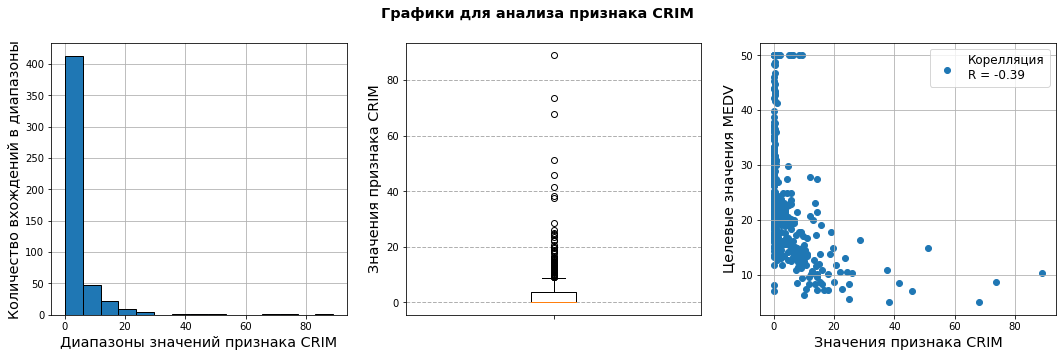

Распределение значений признака CRIM похоже на экспоненциальное, количество выбросов относительно велико
Корелляция слабая отрицательная


In [7]:
hist_boxplot(data['CRIM'], data['MEDV'])
print('Распределение значений признака CRIM похоже на экспоненциальное, количество выбросов относительно велико')
print('Корелляция слабая отрицательная')

#### Признак ZN

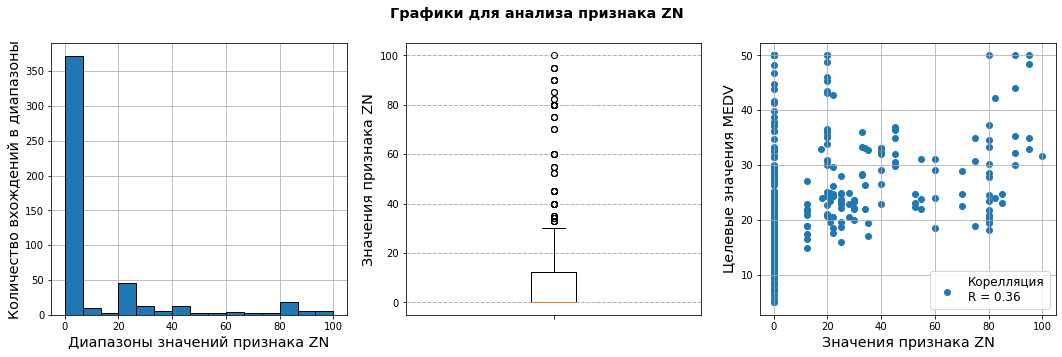

Закон распределения значений признака ZN установить сложно, количество выбросов относительно велико
Корелляция слабая положительная


In [8]:
hist_boxplot(data['ZN'], data['MEDV'])
print('Закон распределения значений признака ZN установить сложно, количество выбросов относительно велико')
print('Корелляция слабая положительная')

#### Признак INDUS

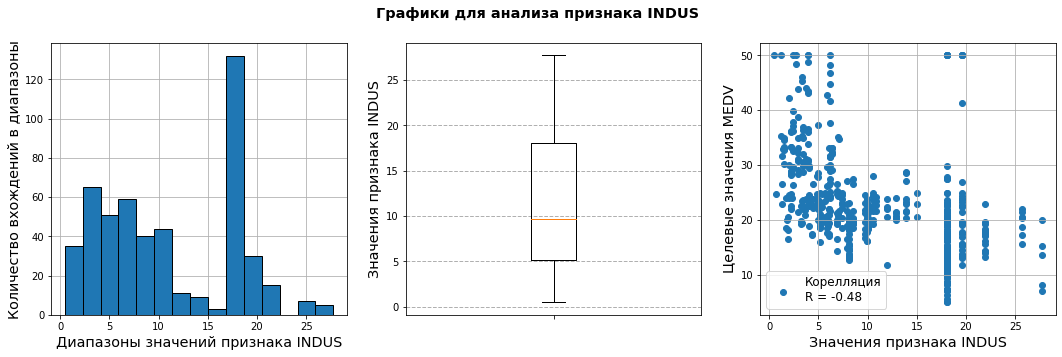

Закон распределения значений признака INDUS установить сложно, выбросы отсутствуют
Корелляция слабая отрицательная


In [9]:
hist_boxplot(data['INDUS'], data['MEDV'])
print('Закон распределения значений признака INDUS установить сложно, выбросы отсутствуют')
print('Корелляция слабая отрицательная')

#### Признак CHAS

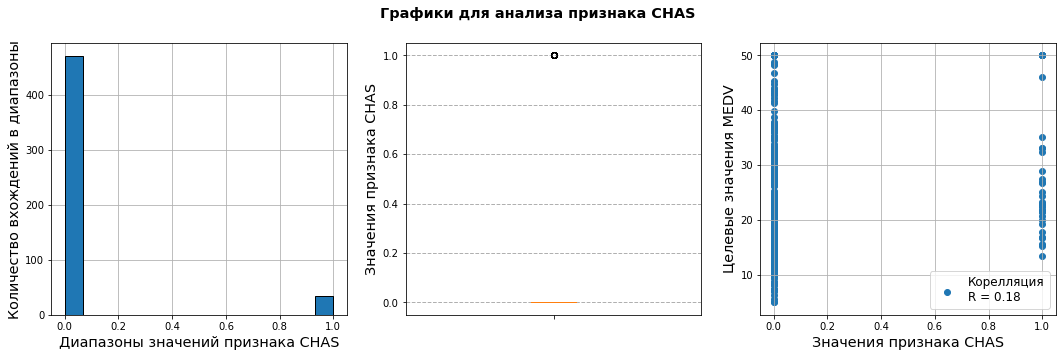

Признак CHAS бинарный, выбросы отсутствуют
Корелляция очень слабая положительная


In [10]:
hist_boxplot(data['CHAS'], data['MEDV'])
print('Признак CHAS бинарный, выбросы отсутствуют')
print('Корелляция очень слабая положительная')

#### Признак NOX

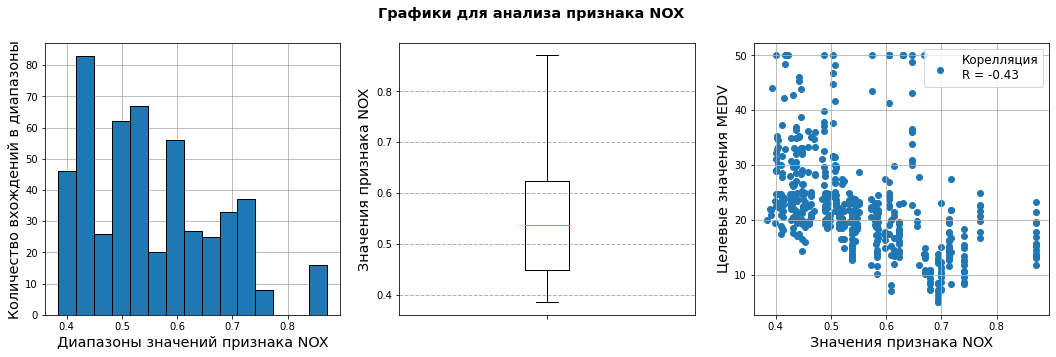

Распределение значений признака NOX похоже на экспоненциальное, выбросы отсутствуют
Корелляция слабая отрицательная


In [11]:
hist_boxplot(data['NOX'], data['MEDV'])
print('Распределение значений признака NOX похоже на экспоненциальное, выбросы отсутствуют')
print('Корелляция слабая отрицательная')

#### Признак RM

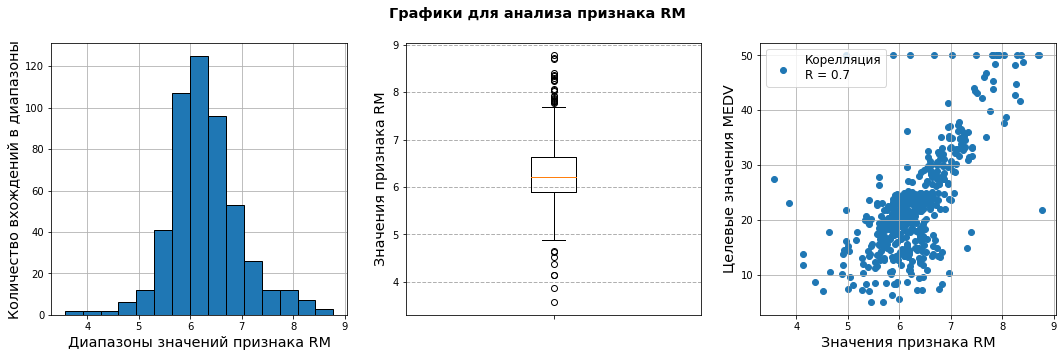

Распределение значений признака RM похоже на нормальное, количество выбросов относительно велико
Корелляция высокая положительная


In [12]:
hist_boxplot(data['RM'], data['MEDV'])
print('Распределение значений признака RM похоже на нормальное, количество выбросов относительно велико')
print('Корелляция высокая положительная')

#### Признак AGE

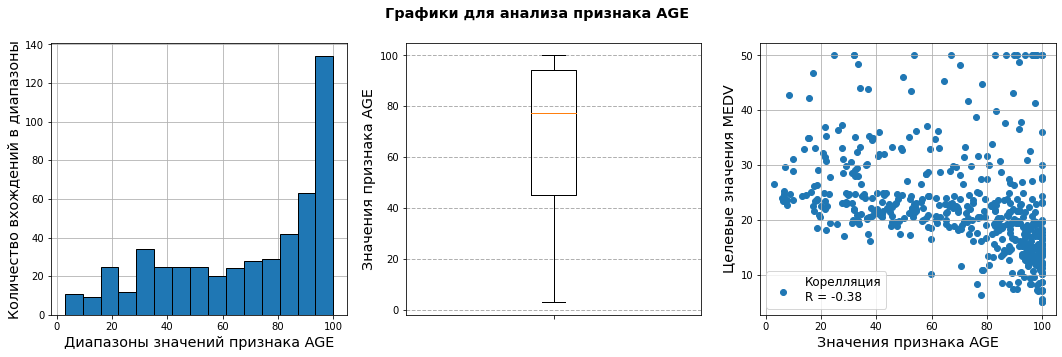

Закон распределения значений признака AGE установить сложно, выбросы отсутствуют
Корелляция слабая отрицательная


In [13]:
hist_boxplot(data['AGE'], data['MEDV'])
print('Закон распределения значений признака AGE установить сложно, выбросы отсутствуют')
print('Корелляция слабая отрицательная')

#### Признак DIS

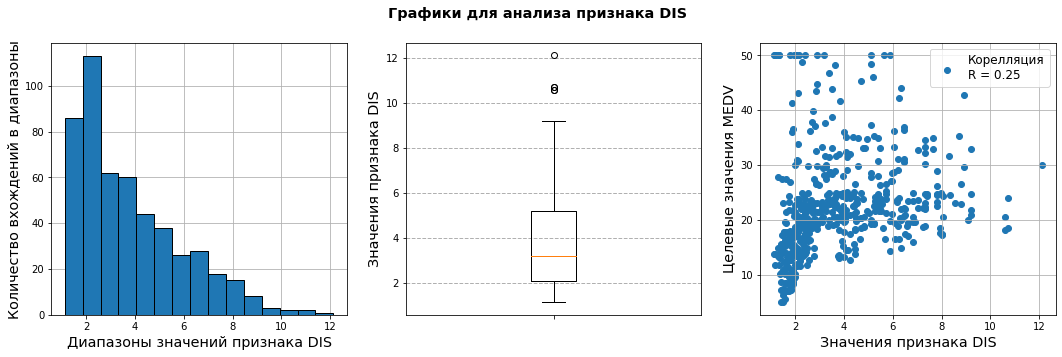

Распределение значений признака DIS похоже на логнормальное, количество выбросов относительно мало
Корелляция очень слабая положительная


In [14]:
hist_boxplot(data['DIS'], data['MEDV'])
print('Распределение значений признака DIS похоже на логнормальное, количество выбросов относительно мало')
print('Корелляция очень слабая положительная')

#### Признак RAD

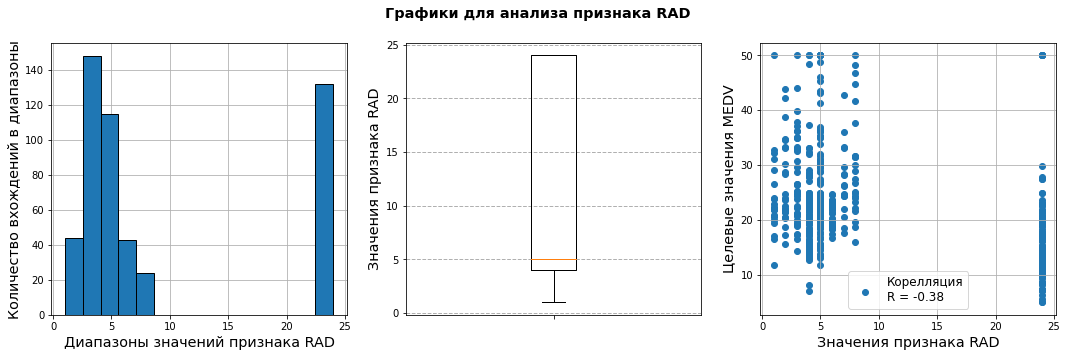

Закон распределения значений признака RAD установить сложно, выбросы отсутствуют
Корелляция слабая отрицательная


In [15]:
hist_boxplot(data['RAD'], data['MEDV'])
print('Закон распределения значений признака RAD установить сложно, выбросы отсутствуют')
print('Корелляция слабая отрицательная')

#### Признак TAX

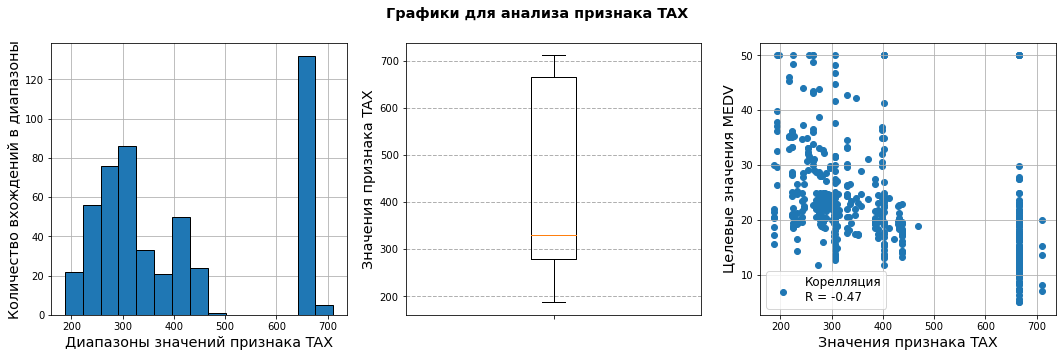

Закон распределения значений признака TAX установить сложно, выбросы отсутствуют
Корелляция слабая отрицательная


In [16]:
hist_boxplot(data['TAX'], data['MEDV'])
print('Закон распределения значений признака TAX установить сложно, выбросы отсутствуют')
print('Корелляция слабая отрицательная')

#### Признак PTRATIO

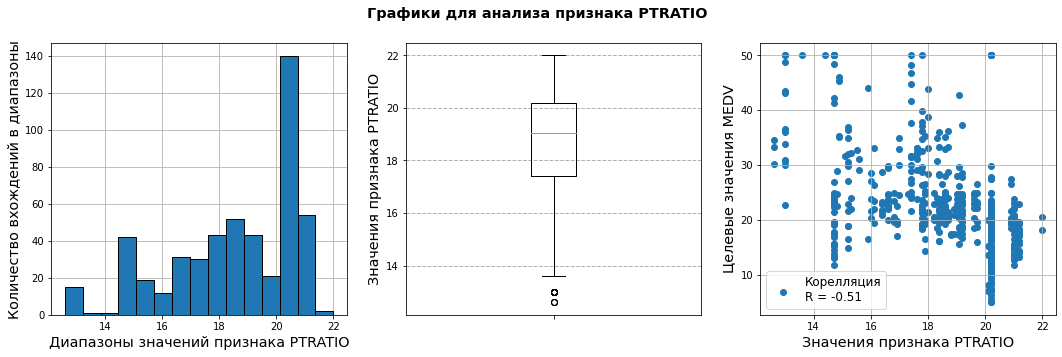

Закон распределения значений признака PTRATIO установить сложно, количество выбросов относительно мало
Корелляция средняя отрицательная


In [17]:
hist_boxplot(data['PTRATIO'], data['MEDV'])
print('Закон распределения значений признака PTRATIO установить сложно, количество выбросов относительно мало')
print('Корелляция средняя отрицательная')

#### Признак B

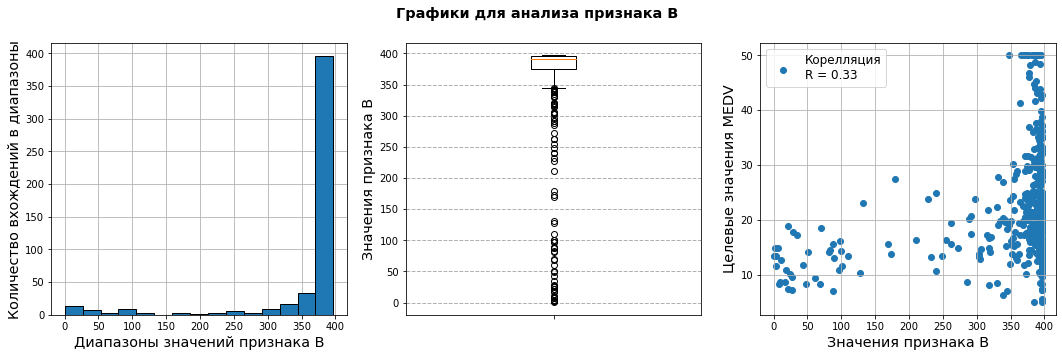

Закон распределения значений признака B установить сложно, количество выбросов относительно велико
Корелляция слабая положительная


In [18]:
hist_boxplot(data['B'], data['MEDV'])
print('Закон распределения значений признака B установить сложно, количество выбросов относительно велико')
print('Корелляция слабая положительная')

#### Признак LSTAT

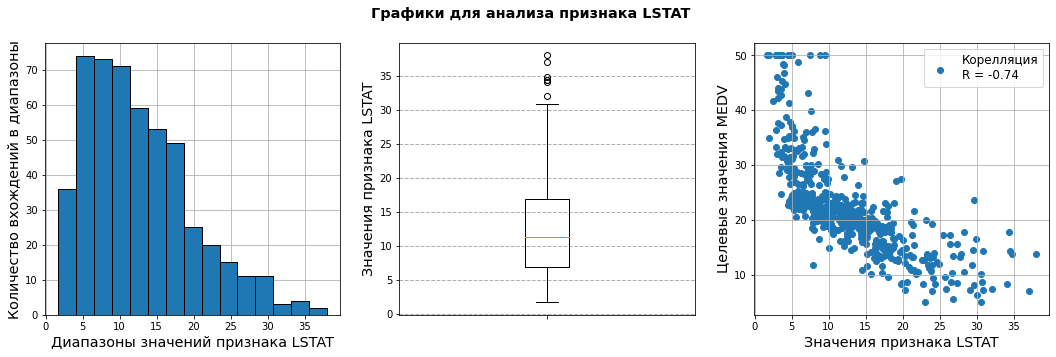

Распределение значений признака DIS похоже на логнормальное, количество выбросов относительно мало
Корелляция высокая отрицательная


In [19]:
hist_boxplot(data['LSTAT'], data['MEDV'])
print('Распределение значений признака DIS похоже на логнормальное, количество выбросов относительно мало')
print('Корелляция высокая отрицательная')

#### Точность модели при отбрасывании признаков с очень слабой корелляцией (R < 0,3)

In [20]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
score_all_data = model_fit_score(data[features], data['MEDV'])
print(score_all_data)
print('Результаты ухудшились! Значит нельзя отбрасывать признаки со слабой корелляцией')

{'R2': 0.634289016023541, 'MAE': 3.2900594997020383}
Результаты ухудшились! Значит нельзя отбрасывать признаки со слабой корелляцией


#### Проверим взаимную корелляцию признаков

In [21]:
print('Следующие признаки имеют высокую корелляцию:')
for feature1 in data.columns[:-1]:
    for feature2 in data.columns[:-1]:
        corr = data[feature1].corr(data[feature2])
        if (corr > 0.7) & (feature1 > feature2) :
            print(f'{feature1}-{feature2} R = {round(corr, 2)}')

Следующие признаки имеют высокую корелляцию:
NOX-INDUS R = 0.76
NOX-AGE R = 0.73
TAX-INDUS R = 0.72
TAX-RAD R = 0.91


#### Точность модели при отбрасывании признаков с высокой взаимной корелляцией (R > 0,7)

In [22]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
score_all_data = model_fit_score(data[features], data['MEDV'])
print(score_all_data)
print('Результаты ухудшились! Значит нельзя отбрасывать признаки с высокой взаимной корелляцией')

{'R2': 0.64943460108727, 'MAE': 3.1743098529522764}
Результаты ухудшились! Значит нельзя отбрасывать признаки с высокой взаимной корелляцией


#### Проверим распределение целевых значений

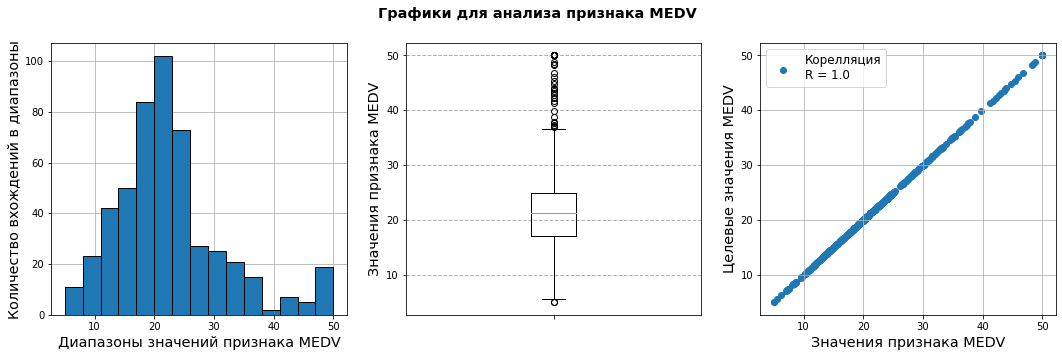

Распределение значений признака MEDV похоже на нормальное, количество выбросов относительно велико
На конце распределения виден хвост около значений 50, на предыдущих графиках так же видно, что значения MEDV ограничены на 50


In [23]:
hist_boxplot(data['MEDV'], data['MEDV'])
print('Распределение значений признака MEDV похоже на нормальное, количество выбросов относительно велико')
print('На конце распределения виден хвост около значений 50, на предыдущих графиках так же видно, что значения MEDV ограничены на 50')

#### Отбросим значения MEDV = 50

In [24]:
data_MEDV_without_50 = data[data['MEDV'] != 50]
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
score_all_data = model_fit_score(data_MEDV_without_50[features], data_MEDV_without_50['MEDV'])
print(score_all_data)
print(f'Отбросили {len(data[data["MEDV"] == 50])} строк. Результаты улучшились!')

{'R2': 0.7406512216551076, 'MAE': 2.7581448620187667}
Отбросили 16 строк. Результаты улучшились!


#### Создадим новые признаки

In [25]:
# Диаграммы рассеяния показывают нелинейную зависимость целевых значений MEDV от признаков INDUS, AGE, DIS и LSTAT 
# Создадим новые стобцы с указанными признаками в квадрате
data_MEDV_without_50['INDUS_2'] = data_MEDV_without_50['INDUS'] ** 2
data_MEDV_without_50['AGE_2'] = data_MEDV_without_50['AGE'] ** 2
data_MEDV_without_50['DIS_2'] = data_MEDV_without_50['DIS'] ** 2
data_MEDV_without_50['LSTAT_2'] = data_MEDV_without_50['LSTAT'] ** 2

<ipython-input-25-144faf50639e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_MEDV_without_50['INDUS_2'] = data_MEDV_without_50['INDUS'] ** 2
<ipython-input-25-144faf50639e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_MEDV_without_50['AGE_2'] = data_MEDV_without_50['AGE'] ** 2
<ipython-input-25-144faf50639e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

#### Точность модели после создания новых признаков

In [27]:
features = ['CRIM', 'ZN', 'INDUS', 'INDUS_2', 'CHAS', 'NOX', 'RM', 'AGE', 'AGE_2', 'DIS', 'DIS_2', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'LSTAT_2']
score_all_data = model_fit_score(data_MEDV_without_50[features], data_MEDV_without_50['MEDV'])
print(score_all_data)
print('Результаты улучшились!')

{'R2': 0.7735601756109322, 'MAE': 2.5260789908679806}
Результаты улучшились!


#### Точность модели после Z-масштабирования

In [28]:
scaler = StandardScaler()
col_names = data_MEDV_without_50.columns
index = data_MEDV_without_50.index
data_MEDV_without_50_scaler = pd.DataFrame(scaler.fit_transform(data_MEDV_without_50), index = index, columns = col_names)

features = ['CRIM', 'ZN', 'INDUS', 'INDUS_2', 'CHAS', 'NOX', 'RM', 'AGE', 'AGE_2', 'DIS', 'DIS_2', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'LSTAT_2']
score_all_data = model_fit_score(data_MEDV_without_50_scaler[features], data_MEDV_without_50_scaler['MEDV'])
print(score_all_data)       
print('Результаты практически не изменились, MAE уменьшился из-за масштабирования!')

{'R2': 0.7735601756109348, 'MAE': 0.3214957131735627}
Результаты практически не изменились, MAE уменьшился из-за масштабирования!


#### Выводы:
- все признаки важны, отбрасывание части признаков ведёт к ухудшению точности модели
- несколько целевых значений лежат на границе 50 (это предел, выше которого значения не поднимаются), их отбрасывание ведёт к улучшению точности модели
- создание новых признаков (возведение в квадрат некоторых признаков) ведёт к улучшению точности модели
- Z-масштабирование не влияет на точность модели

Достигнуты показатели точности R2 = 0,77, MAE = 0,32